In [1]:
%matplotlib notebook
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Model: Lorentzian (1 peak)
def L1(x, b1, g, a, c):
    return ( a*(g**2)/((x-b1)**2+g**2) + c  )

#Model: Lorentzian (2 peaks)
def L2(x, b1, b2, g, a, c):
    return ( a*(g**2)/((x-b1)**2+g**2) + a*(g**2)/((x-b2)**2+g**2) + c  )

$$L_1(x)=a \left( \frac{g²}{(x-b_1)²+g²} \right)+ c$$
$$L_2(x)=a \left( \frac{g²}{(x-b_1)²+g²} \right)+ a \left( \frac{g²}{(x-b_2)²+g²} \right) + c$$

In [3]:
#Data from CSV
cols = ['Time', 'Voltage']
# Using Tektronix OSA
# 1 peak
data1 = pd.read_csv('F0008CH4.CSV', sep=',', usecols=[3,4], header=None, names=cols)
# 2 peaks
data2 = pd.read_csv('F0007CH4.CSV', sep=',', usecols=[3,4], header=None, names=cols)

In [4]:
#Assigning data to our variables
[xdata1, ydata1, xdata2, ydata2] = [data1.Time, data1.Voltage, data2.Time, data2.Voltage]

<IPython.core.display.Javascript object>


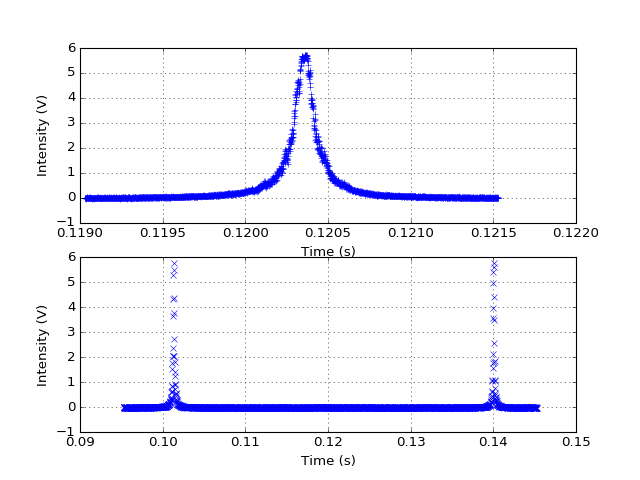

In [5]:
#Plotting ydata vs xdata
%matplotlib notebook
plt.subplot(2, 1, 1)
plt.plot(xdata1, ydata1, '+')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (V)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(xdata2, ydata2, 'x')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (V)')
plt.grid()

plt.show()

g = 68.994340445 us
2g = BW(t)* = 137.98868089 us


<IPython.core.display.Javascript object>


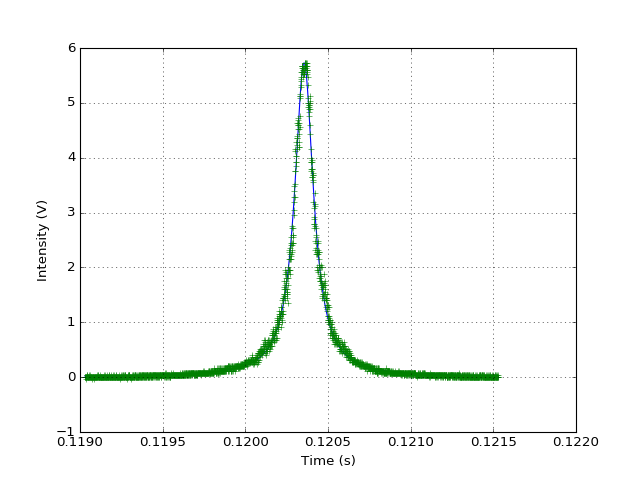

In [6]:
# Analizing one peak
popt1, pov1 = curve_fit(L1, xdata1, ydata1, 
                      p0=[0.1204, 120e-6, 6, 0])

L = 4.811 # Filter cavity length (m)
FSR = 300/L # FSR in MHz

BWt = 2*popt1[1]
print('g =', (BWt/2)*1e+6, 'us')
print('2g = BW(t)* =', BWt*1e+6, 'us')

L1fit = L1(xdata1, popt1[0], popt1[1], popt1[2], popt1[3])

%matplotlib notebook
L1plot = plt.plot(xdata1, L1fit, xdata1, ydata1, "+")
plt.xlabel('Time (s)')
plt.ylabel('Intensity (V)')
plt.grid()
plt.show()

b1 = 101.320822497 ms
b2 = 140.034297409 ms
(b2 - b1) = FSR(t)* = 38.713474912 ms 

Cavity properties:
F = 280.555438767
FSR = 62.357098316358346 MHz
BW = 0.222263017214 MHz


<IPython.core.display.Javascript object>


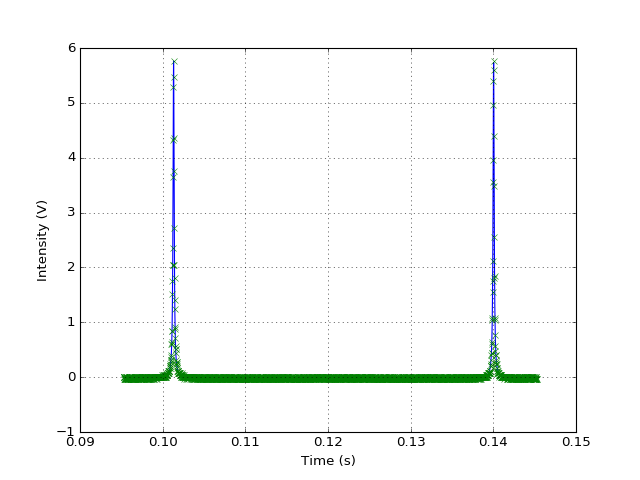

In [7]:
# Analizing two peaks
popt2, pov2 = curve_fit(L2, xdata2, ydata2, 
                      p0=[0.102, 0.14, 68e-6, 5.7, 0])
popt2, pov2

print('b1 =' , popt2[0]*1e+3, 'ms')
print('b2 =', popt2[1]*1e+3, 'ms')
FSRt = (popt2[1]-popt2[0])
print('(b2 - b1) = FSR(t)* =',FSRt*1e+3, 'ms', '\n')

F = FSRt/BWt
print('Cavity properties:')
print('F =', F)
print('FSR =', FSR, 'MHz')
print('BW =', FSR/F, 'MHz' )

L2fit = L2(xdata2, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4])

%matplotlib notebook
L2plot = plt.plot(xdata2, L2fit, xdata2, ydata2, "x")
plt.xlabel('Time (s)')
plt.ylabel('Intensity (V)')
plt.grid()
plt.show()